# Chapters 6 and 7: Convolution and Correlation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.signal import convolve, unit_impulse

## Convolution

The <strong>impulse response</strong> is the signal that is obtained from a system when a delta function (unit impulse) is the input. Since any input signal can be regarded as a set of impulses, knowing the impulse response of the system is useful. The output of the system can be obtained by convolving the input signal and the impulse response. 

If the system being considered is a filter, the impulse response is called the <strong>filter kernel</strong>, the <strong>convolution kernel</strong>, or the <strong>kernel</strong>. In image processing, the impulse response is called the <strong>point spread function</strong>.

Let us calculate convolution of the input signal x[n] and impulse response h[n] to get the output y[n]. Here, x[n] and h[n] are given in the next 2 cells.

In [2]:
x = np.array([0, -1, -1.15, 2, 1.2, 1.2, 0.5, 0, -0.8]) # 9 points
h = np.array([1, -0.5, -0.25, -0.1])  # 4 points

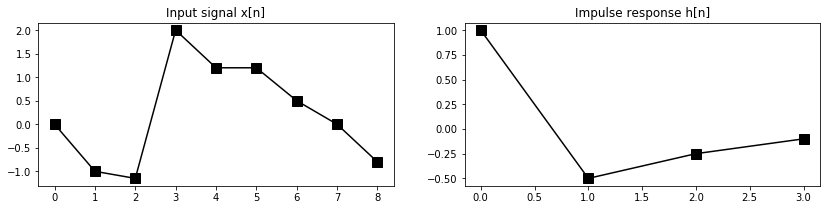

In [3]:
fig=plt.figure(figsize=(14,3))
ax=fig.add_subplot(121)
ax.plot(x, marker='s', color='black', markersize=10)
ax.set_title('Input signal x[n]')

ax=fig.add_subplot(122)
ax.plot(h, marker='s', color='black', markersize=10)
ax.set_title('Impulse response h[n]')
plt.show()

Concretely, the convolution can be calculated as follows:

y[0] = x[0] h[0]  
y[1] = x[0] h[1] + x[1] h[0]  
y[2] = x[0] h[2] + x[1] h[1] + x[2] h[0]  
y[3] = x[0] h[3] + x[1] h[2] + x[2] h[1] + x[3] h[0]    
y[4] = x[1] h[3] + x[2] h[2] + x[3] h[1] + x[4] h[0]    
y[5] = x[2] h[3] + x[3] h[2] + x[4] h[1] + x[5] h[0]    
y[6] = x[3] h[3] + x[4] h[2] + x[5] h[1] + x[6] h[0]    
...   
$$
y[n]=\sum_{i=0}^{k-1}{x[n-i]h[i]},
$$
where k is the number of samples in impulse response (h). This generalized equation is the formal definition of convolution and simply written as y[n] = x[n] * h[n] . It should be also noted that the convolution is commutative, i.e., a * b = b * a.


Let us make a function so that we can easily perform convolution.

In [4]:
def conv(my_x, my_h):
# my_x: input signal
# my_h: impulse response
    my_y = np.zeros(my_x.shape[0] + my_h.shape[0]-1) #initialization
    
    k = my_h.shape[0] # number of points in the impulse response
    
    for i in range(my_x.shape[0]):
        my_y[i:i+k] = my_y[i:i+k] + my_x[i] * my_h

    return my_y

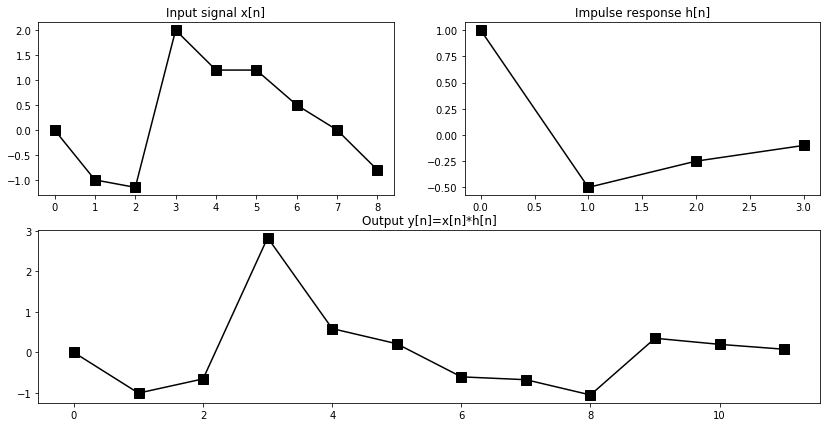

In [5]:
y=conv(x,h) # convolution. shape: 12

fig=plt.figure(figsize=(14,7))
ax=fig.add_subplot(221)
ax.plot(x, marker='s', color='black', markersize=10)
ax.set_title('Input signal x[n]')

ax=fig.add_subplot(222)
ax.plot(h, marker='s', color='black', markersize=10)
ax.set_title('Impulse response h[n]')

ax=fig.add_subplot(212)
ax.plot(y, marker='s', color='black', markersize=10)
ax.set_title('Output y[n]=x[n]*h[n]')

plt.show()

Even though the function for convolution was defined above, python provides [numpy.convolve](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) and [scipy.signal.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html#scipy.signal.convolve) to performe convolution: 

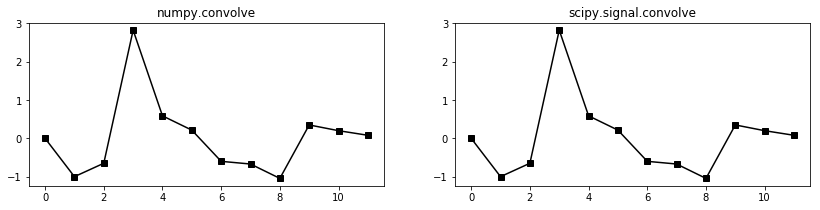

In [6]:
fig=plt.figure(figsize=(14,3))
ax=fig.add_subplot(121)
ax.plot(np.convolve(x,h),color='k',marker='s') # numpy
ax.set_title("numpy.convolve")

ax=fig.add_subplot(122)
ax.plot(convolve(x,h),color='k',marker='s') # scipy
ax.set_title("scipy.signal.convolve")

plt.show()

Of course, they are the same.

## Effect of convolution

Let us have a look at the definition of the convolution again:
$$
y[n]=\sum_{i=0}^{k-1}{x[n-i]h[i]},
$$
As you can expect from this equation, the far left and far right samples in the output signal are based on incomplete information. For example, y[0] is determined only by x[0] and h[0]. This means that the impulse response is not fully immersed in the input signal. Concretely, if the number of points in the impulse response is k, the first and last k-1 samples in the output signal are based on less information than the samples between.

The incomplete immersion of the impulse response in the input signal can be investigated in the next cell. Here, as an input signal, a sine wave (81 points) with a DC component is considered. The impulse response (31 points) is a sinc function, which works as a high pass filter and removes the DC component in the input signal. The output signal includes 81+31-1=111 points. As indicated by the red dashed lines, the output signal outside the red lines shows a strange behavior.  

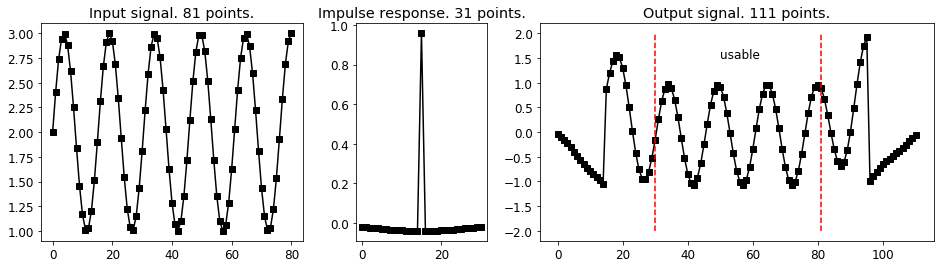

In [31]:
plt.rcParams["font.size"] =12

y_sin = np.sin(np.linspace(0,33,81))+2 # sine wave with DC component

# preparation of high pass filter (sinc function)
omega_c=0.13 #0.2 # cutoff frequency
x=np.linspace(-15,15,31) 
h=unit_impulse(31, 15)-omega_c/np.pi*np.sinc(omega_c/np.pi*x) # high pass filter 


fig=plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(1,3, width_ratios=[2,1,3]) 

ax1=fig.add_subplot(gs[0])
ax1.plot(y_sin, marker='s', color='black') # original signal (sine wave with DC component)
ax1.set_title('Input signal. %d points.'%y_sin.shape[0])

ax2=fig.add_subplot(gs[1])
ax2.plot(h, marker='s', color='black') # impulse response (high pass filter)
ax2.set_title('Impulse response. %d points.'%h.shape[0])


output=np.convolve(y_sin,h) # convolution
ax3=fig.add_subplot(gs[2])
ax3.plot(output, marker='s', color='black')
ax3.plot(np.array([30,30]),np.array([-2,2]), color='red', linestyle='--')
ax3.plot(np.array([111-30,111-30]),np.array([-2,2]), color='red', linestyle='--')
ax3.set_title('Output signal. %d points.'%output.shape[0])
ax3.text(50,1.5, 'usable')
plt.show()

## Shift by delta function

Shift: x[n] * &delta;[n+s] = x[n+s]

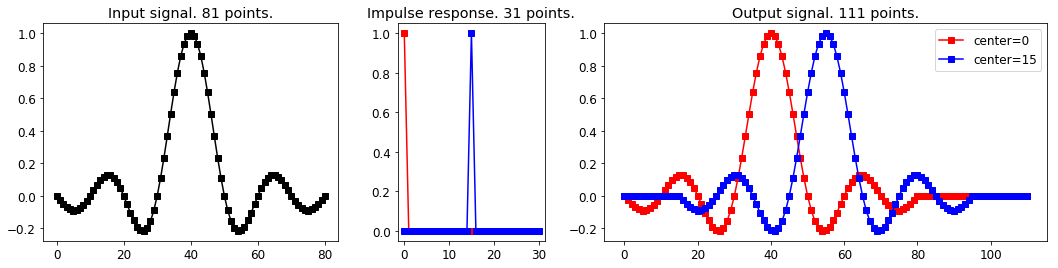

In [36]:
x=np.sinc(np.linspace(-40,40,81)/10)

fig=plt.figure(figsize=(18,4))
gs = gridspec.GridSpec(1,3, width_ratios=[2,1,3]) 

ax1=fig.add_subplot(gs[0])
ax1.plot(x, marker='s', color='black') # original signal (sine wave with DC component)
ax1.set_title('Input signal. %d points.'%y_sin.shape[0])


ax2=fig.add_subplot(gs[1])
ax2.plot(unit_impulse(31, 0), marker='s', color='red') # impulse response (high pass filter)
ax2.plot(unit_impulse(31, 15), marker='s', color='blue') # impulse response (high pass filter)
ax2.set_title('Impulse response. %d points.'%h.shape[0])

output=np.convolve(x,unit_impulse(31, 0)) # convolution
ax3=fig.add_subplot(gs[2])
ax3.plot(output, marker='s', color='red')
ax3.plot(np.convolve(x,unit_impulse(31, 15)), marker='s', color='blue')
ax3.set_title('Output signal. %d points.'%output.shape[0])
ax3.legend(['center=0', 'center=15'])
plt.show()

## Central limit theorem

If a pulse-like signal is convoluted with itself many times, a Gaussian is produced.

In [113]:
# Creating a pulse-like signal

x=np.zeros(50)

np.random.seed(1)
for i in range(x.shape[0]):
    x[i]=x[i]+np.random.normal(loc=0.5, scale=0.2)

x[25]+= np.random.normal(loc=4, scale=0.5)
x[26]+= np.random.normal(loc=3, scale=0.5)
x[27]+= np.random.normal(loc=2, scale=0.5)
x[28]+= np.random.normal(loc=5, scale=0.5)
x[29]+= np.random.normal(loc=4, scale=0.5)

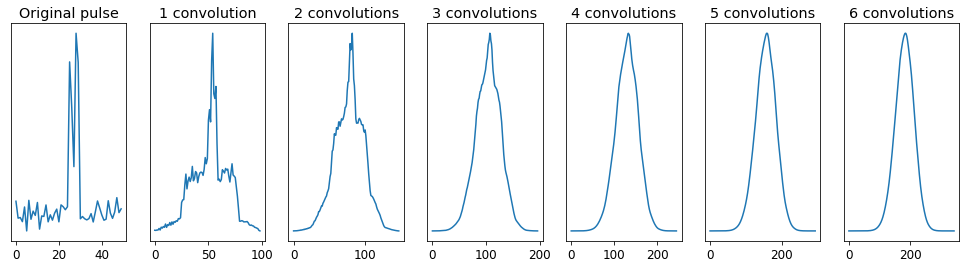

In [112]:
fig = plt.figure(figsize=(17,4))
ax1=fig.add_subplot(171)
ax1.plot(x)
ax1.set_title('Original pulse')
ax1.axes.yaxis.set_ticks([])


x_conv=np.convolve(x,x) # 1 conv
ax2=fig.add_subplot(172)
ax2.plot(x_conv)
ax2.set_title('1 convolution')
ax2.axes.yaxis.set_ticks([])


x_conv=np.convolve(x,x_conv) # 2 convs
ax3=fig.add_subplot(173)
ax3.plot(x_conv)
ax3.set_title('2 convolutions')
ax3.axes.yaxis.set_ticks([])


x_conv=np.convolve(x,x_conv) # 3 convs
ax4=fig.add_subplot(174)
ax4.plot(x_conv)
ax4.set_title('3 convolutions')
ax4.axes.yaxis.set_ticks([])


x_conv=np.convolve(x,x_conv) # 4 convs
ax5=fig.add_subplot(175)
ax5.plot(x_conv)
ax5.set_title('4 convolutions')
ax5.axes.yaxis.set_ticks([])


x_conv=np.convolve(x,x_conv) # 5 convs
ax6=fig.add_subplot(176)
ax6.plot(x_conv)
ax6.set_title('5 convolutions')
ax6.axes.yaxis.set_ticks([])


x_conv=np.convolve(x,x_conv) # 6 convs
ax7=fig.add_subplot(177)
ax7.plot(x_conv)
ax7.set_title('6 convolutions')
ax7.axes.yaxis.set_ticks([])

plt.show()

## Correlation

Let us compare transmitted and received signals of a radar system. The value of the <strong>cross-correlation</strong> is maximized when the target signal is aligned with the same features in the received signal. Hence, the correlation is the optimal technique for detecting a known waveform in random noise. Using correlation to detect a known waveform is called <strong>matched filtering</strong>.

Correlation and convolution are very similar. If we have a[n] and b[n], we can get c[n] = a[n] * b[n] through convolution. In contrast, correlation of a and b can be obtained by a[n] * b[-n], where -n indicates that the order is flipped. 

In [170]:
# Creating transmitted and received signals.

x_transmit=np.zeros(50)
x_received=np.zeros(50)


x_transmit[10]+= 50
x_transmit[11]+= 40
x_transmit[12]+= 30
x_transmit[13]+= 20
x_transmit[14]+= 10

x_received[30]+= 50
x_received[31]+= 40
x_received[32]+= 30
x_received[33]+= 20
x_received[34]+= 10

np.random.seed(1)
for i in range(x.shape[0]):
    x_received[i]=x_received[i]+np.random.normal(loc=0.5, scale=8)

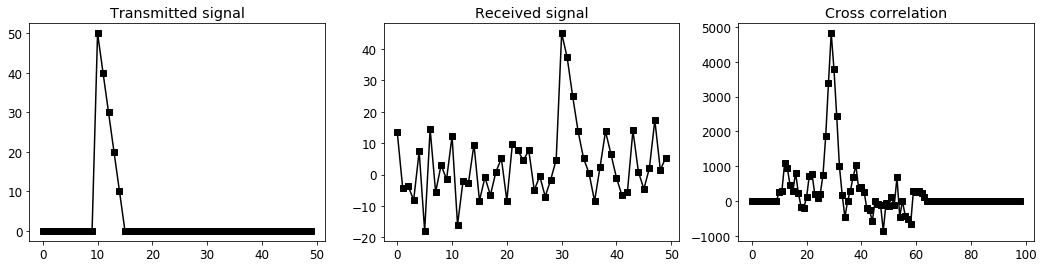

In [171]:
fig=plt.figure(figsize=(18,4))
# Transmitted
ax1=fig.add_subplot(131)
ax1.plot(x_transmit, color='black', marker='s')
ax1.set_title("Transmitted signal")


# Received
ax2=fig.add_subplot(132)
ax2.plot(x_received, color='black', marker='s')
ax2.set_title("Received signal")


# Correlation
flip_x_rec=np.fliplr(x_received.reshape(1,x_received.shape[0])).flatten() # flipping the order
cor= np.convolve(x_transmit, flip_x_rec) # convolution
ax3=fig.add_subplot(133)
ax3.plot(cor, color='black', marker='s')
ax3.set_title("Cross correlation")


plt.show()

It is also possible to use [numpy.correlate](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html). When you want the aforementioned correlation, mode should be "full."

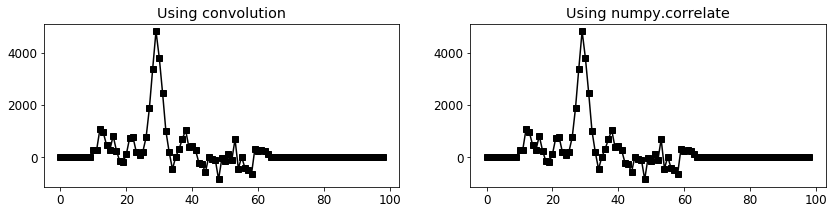

In [172]:
fig=plt.figure(figsize=(14,3))
ax=fig.add_subplot(121)
ax.plot(np.convolve(x_transmit, flip_x_rec),color='k',marker='s') # numpy
ax.set_title("Using convolution")

ax=fig.add_subplot(122)
ax.plot(np.correlate(x_transmit, x_received, mode='full'),color='k',marker='s') # scipy
ax.set_title("Using numpy.correlate")

plt.show()

Of course, they are the same.